# WeatherPy

## Observations

* From the temperature scatter plot we indeed see that the temperatures are highest at low latitudes (near the equator). We of course see excursions at moderate latitudes on the Northern hemisphere because of summer there and lower temperatures at moderate latitudes on the Southern hemisphere because of winter there.

* Further, in the temperature scatter plot there are a number of outliers with unusually low temperatures on the Northern hemisphere at low latitudes. An inspection of these points shows that they are in mountainous regions. Obviously, it's cold in the mountains even in summer.

* The humidity plot shows that it varies wildly with latitude without a clear trend. This plot also lets us realize that there are more cities in our sample from in the Northern hemisphere. There's a lot of water and uninhabited regions in the Southern hemisphere, so this is not too surprising.

* Similar to humidity, there is no clear trend with the cloudiness data. One would expect humidity and cloudiness somewhat correlated. This could be analyzed further.

* The wind speed plot reveals that there are very high winds in polar regions (high latitudes) today. Otherwise wind speed doesn't appear to have a strong dependence on latitude.

* Overall, we note that this data sample is from a single day only. In order to get a more meaningful view of latitudinal variation of weather, it'd be good to look at averages over many days or even weeks. Much longer periods might not be meaningful though because of seasonal variations.



In [178]:
# Dependencies and Setup
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [179]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Make this a data frame
df = pd.DataFrame(cities,columns=['city'])

# prepare columns
df['lon'] = 0.0
df['lat'] = 0.0
df['temperature'] = -9999.0 # we'll use this to filter out failed API calls
df['humidity'] = 0.0
df['cloudiness'] = 0.0
df['wind speed'] = 0.0

df.head(5)


,city,lon,lat,temperature,humidity,cloudiness,wind speed
0,longyearbyen,0.0,0.0,-9999.0,0.0,0.0,0.0
1,kapaa,0.0,0.0,-9999.0,0.0,0.0,0.0
2,sumbawa,0.0,0.0,-9999.0,0.0,0.0,0.0
3,santa rosa,0.0,0.0,-9999.0,0.0,0.0,0.0
4,mataura,0.0,0.0,-9999.0,0.0,0.0,0.0


## Perform API Calls

In [181]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
api_url = "http://api.openweathermap.org/data/2.5/weather"

params = {}
params['q'] = "gamba"
params['APPID'] = api_key
params['units'] = "Imperial"
# for testing:
#res = requests.get(api_url,params=params)
#pprint(res.json())
#assert(1==0)

failed = []
count = 0
for index,row in df.iterrows():
    count += 1
    params['q'] = row['city']
    print(f"API call {count}! Getting Data for {row['city']}.")
    try:
        res = requests.get(api_url,params=params)
        ddata = res.json()
        df.at[index,'lat'] = ddata['coord']['lat']
        df.at[index,'lon'] = ddata['coord']['lon']
        df.at[index,'humidity'] = ddata['main']['humidity']
        df.at[index,'temperature'] = ddata['main']['temp_max']
        df.at[index,'wind speed'] = ddata['wind']['speed']
        df.at[index,'cloudiness'] = ddata['clouds']['all']
    except Exception as e:
        print(e)
        msg = f"Ups! API call for {row['city']} failed or returned garbage. Moving on..."
        print(msg)
        failed.append(row)
        df.at[index,'temperature'] = -10000.00
        continue
    
print("Done!")
    

API call 1! Getting Data for longyearbyen.
API call 2! Getting Data for kapaa.
API call 3! Getting Data for sumbawa.
'coord'
Ups! API call for sumbawa failed or returned garbage. Moving on...
API call 4! Getting Data for santa rosa.
API call 5! Getting Data for mataura.
API call 6! Getting Data for puerto ayora.
API call 7! Getting Data for boa vista.
API call 8! Getting Data for manta.
API call 9! Getting Data for veinticinco de mayo.
API call 10! Getting Data for vaini.
API call 11! Getting Data for mys shmidta.
'coord'
Ups! API call for mys shmidta failed or returned garbage. Moving on...
API call 12! Getting Data for port alfred.
API call 13! Getting Data for toora-khem.
API call 14! Getting Data for namibe.
API call 15! Getting Data for kalmunai.
API call 16! Getting Data for hermanus.
API call 17! Getting Data for upernavik.
API call 18! Getting Data for rikitea.
API call 19! Getting Data for karratha.
API call 20! Getting Data for yulara.
API call 21! Getting Data for aksu.
API 

API call 166! Getting Data for cape town.
API call 167! Getting Data for aasiaat.
API call 168! Getting Data for castro.
API call 169! Getting Data for torbay.
API call 170! Getting Data for manbij.
API call 171! Getting Data for mahebourg.
API call 172! Getting Data for luganville.
API call 173! Getting Data for baykit.
API call 174! Getting Data for mezen.
API call 175! Getting Data for dullewala.
API call 176! Getting Data for kotelnich.
API call 177! Getting Data for providencia.
API call 178! Getting Data for longyan.
API call 179! Getting Data for dire dawa.
API call 180! Getting Data for hobart.
API call 181! Getting Data for sirvintos.
API call 182! Getting Data for atuona.
API call 183! Getting Data for margherita.
API call 184! Getting Data for araouane.
API call 185! Getting Data for kwekwe.
API call 186! Getting Data for porto walter.
API call 187! Getting Data for hovd.
API call 188! Getting Data for beloha.
API call 189! Getting Data for rawson.
API call 190! Getting Data

API call 340! Getting Data for keokuk.
API call 341! Getting Data for ambanja.
API call 342! Getting Data for yerbogachen.
API call 343! Getting Data for boa viagem.
API call 344! Getting Data for brae.
API call 345! Getting Data for necochea.
API call 346! Getting Data for jaisalmer.
API call 347! Getting Data for birao.
API call 348! Getting Data for khorramshahr.
API call 349! Getting Data for portland.
API call 350! Getting Data for ust-nera.
API call 351! Getting Data for gorokhovets.
API call 352! Getting Data for nizhniy mamon.
API call 353! Getting Data for muyezerskiy.
API call 354! Getting Data for ashland.
API call 355! Getting Data for sambava.
API call 356! Getting Data for te anau.
API call 357! Getting Data for gornopravdinsk.
API call 358! Getting Data for mayo.
API call 359! Getting Data for zhigansk.
API call 360! Getting Data for qaqortoq.
API call 361! Getting Data for nikolskoye.
API call 362! Getting Data for wonthaggi.
API call 363! Getting Data for port hedland.

API call 511! Getting Data for derzhavinsk.
API call 512! Getting Data for mapimi.
API call 513! Getting Data for wichian buri.
API call 514! Getting Data for rundu.
API call 515! Getting Data for vagur.
API call 516! Getting Data for timoteo.
API call 517! Getting Data for madang.
API call 518! Getting Data for picayune.
API call 519! Getting Data for arlit.
API call 520! Getting Data for ratlam.
API call 521! Getting Data for bjornevatn.
API call 522! Getting Data for camacari.
API call 523! Getting Data for buchanan.
API call 524! Getting Data for faya.
API call 525! Getting Data for charleville-mezieres.
API call 526! Getting Data for margate.
API call 527! Getting Data for bowen.
API call 528! Getting Data for naze.
API call 529! Getting Data for uarini.
API call 530! Getting Data for saiha.
API call 531! Getting Data for carballo.
API call 532! Getting Data for lesnoy.
API call 533! Getting Data for felidhoo.
'coord'
Ups! API call for felidhoo failed or returned garbage. Moving o

In [182]:
print("Failures: ",len(failed))

# remove failed rows
df = df.loc[ df['temperature'] > -9999.0 ]

Failures:  58


In [183]:
df.head(5)

,city,lon,lat,temperature,humidity,cloudiness,wind speed
0,longyearbyen,15.63,78.22,46.40,81.0,75.0,4.70
1,kapaa,-159.32,22.08,84.20,83.0,75.0,11.41
3,santa rosa,-64.29,-36.62,34.04,57.0,0.0,5.19
4,mataura,168.86,-46.19,44.48,93.0,20.0,7.99
5,puerto ayora,-90.35,-0.74,75.20,69.0,90.0,16.11


In [184]:
print(f"We have {len(df)} good entries!")

We have 596 good entries!


In [185]:
# save a csv
df.to_csv('weather_cities.csv',header=True,index=False)

In [186]:
# plotting, set some defaults
from matplotlib import rcParams
rcParams['xtick.major.size'] = 0
rcParams['ytick.major.size'] = 0
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize'] = 20
rcParams['axes.labelsize'] = 20
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'white'
rcParams['grid.color'] = 'white'
#rcParams['axes.alpha'] = 0.1

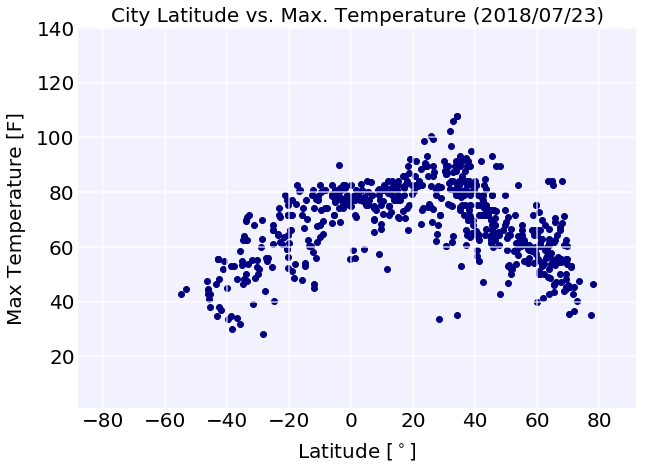

In [192]:
myfig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.patch.set_facecolor('blue')
ax.patch.set_alpha(0.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(lw=2,color='white',alpha=0.6)

lat = df['lat']
temperature = df['temperature']
plt.scatter(lat,temperature,color='navy')
plt.xlim(-88,92)
plt.ylim(1,140)
plt.title('City Latitude vs. Max. Temperature (2018/07/23)',fontsize=20)
plt.ylabel('Max Temperature [F]',labelpad=10)
plt.xlabel('Latitude [$^\circ$]',labelpad=10)
plt.savefig('PyWeather-Temperature.png')

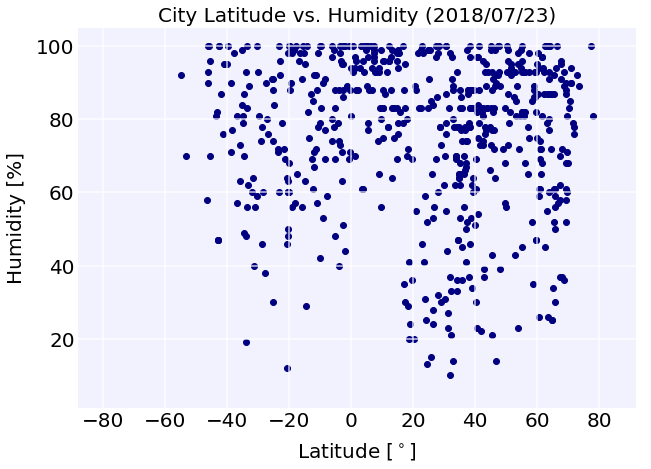

In [193]:
myfig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.patch.set_facecolor('blue')
ax.patch.set_alpha(0.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(lw=2,color='white',alpha=0.6)

lat = df['lat']
humidity = df['humidity']
plt.scatter(lat,humidity,color='navy')
plt.xlim(-88,92)
plt.ylim(1,105)
plt.title('City Latitude vs. Humidity (2018/07/23)',fontsize=20)
plt.ylabel('Humidity [%]',labelpad=10)
plt.xlabel('Latitude [$^\circ$]',labelpad=10)
plt.savefig('PyWeather-Humidity.png')

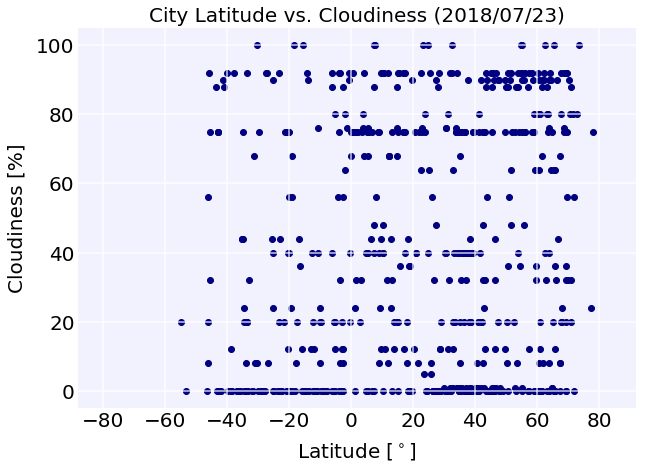

In [194]:
myfig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.patch.set_facecolor('blue')
ax.patch.set_alpha(0.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(lw=2,color='white',alpha=0.6)

lat = df['lat']
cloudiness = df['cloudiness']
plt.scatter(lat,cloudiness,color='navy')
plt.xlim(-88,92)
plt.ylim(-5,105)
plt.title('City Latitude vs. Cloudiness (2018/07/23)',fontsize=20)
plt.ylabel('Cloudiness [%]',labelpad=10)
plt.xlabel('Latitude [$^\circ$]',labelpad=10)
plt.savefig('PyWeather-Cloudiness.png')

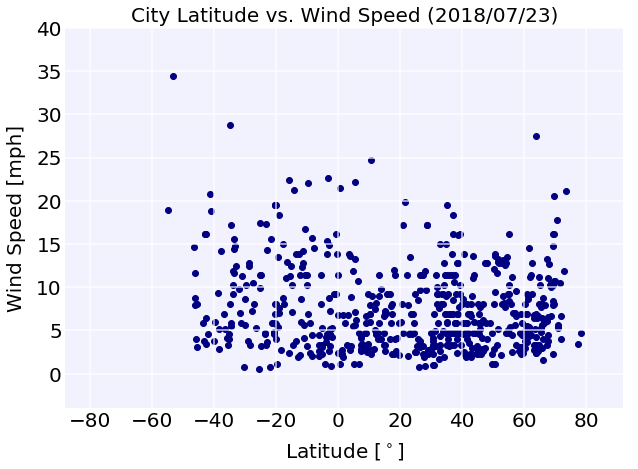

In [195]:
myfig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.patch.set_facecolor('blue')
ax.patch.set_alpha(0.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(lw=2,color='white',alpha=0.6)

lat = df['lat']
windspeed = df['wind speed']
plt.scatter(lat,windspeed,color='navy')
plt.xlim(-88,92)
plt.ylim(-4,40)
plt.title('City Latitude vs. Wind Speed (2018/07/23)',fontsize=20)
plt.ylabel('Wind Speed [mph]',labelpad=10)
plt.xlabel('Latitude [$^\circ$]',labelpad=10)
plt.savefig('PyWeather-Windspeed.png')

In [191]:
# Exploration for understanding some outliers
xdf = df[ (df['lat'] > 0) & (df['lat'] < 40) & (df['temperature'] < 40)  ]
xdf.head(10)

,city,lon,lat,temperature,humidity,cloudiness,wind speed
426,leh,77.58,34.16,35.21,93.0,92.0,1.95
641,gamba,88.52,28.28,33.50,100.0,92.0,2.28
